In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

K_means Clustering

Data Preprocessing

In [3]:
data_set = pd.read_csv("./mc.csv")

In [4]:
data_set.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = data_set.iloc[:,[3,4]].values

Elbow Method to find optimal K - value

[[ 63.72093023  46.1627907 ]
 [ 82.38888889  90.44444444]
 [109.7         22.        ]
 [ 25.0952381   80.04761905]
 [ 24.58333333   9.58333333]
 [ 47.71428571  52.16666667]
 [ 77.78571429  73.28571429]
 [114.71428571  78.42857143]
 [ 80.18181818  12.68181818]
 [ 28.18181818  33.27272727]]


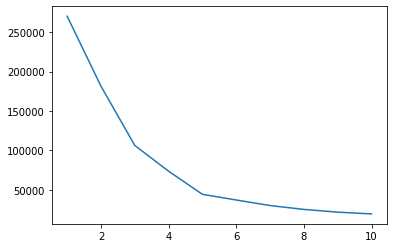

In [6]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42,init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
print(kmeans.cluster_centers_)

In [7]:
print(kmeans.labels_)

[9 3 4 3 9 3 4 3 4 3 4 3 4 3 4 3 9 3 9 3 9 3 4 3 4 3 9 3 9 3 4 3 4 3 4 3 4
 3 9 3 9 3 9 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 0 5 5 0 0 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 6 0 1 8 6 8 6 0 6 8 1 8 6 8 6 8 1 0 1 8 1 0 6
 8 1 8 1 8 6 8 1 8 6 8 6 0 1 8 1 8 6 8 1 8 6 8 6 8 1 8 1 8 6 8 1 2 1 2 1 2
 1 2 7 2 7 2 7 2 7 2 7 2 7 2 7]


In [8]:
kmeans = KMeans(n_clusters=5,random_state=42,init="k-means++")
k_pred = kmeans.fit_predict(X)

In [9]:
print(k_pred.shape)

(200,)


Visualising the Clustering where K = 5

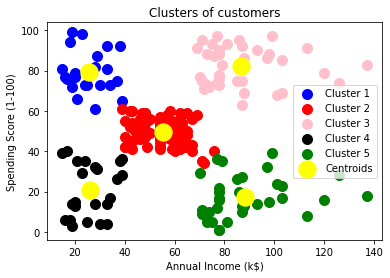

In [12]:
plt.scatter(X[k_pred == 0,0],X[k_pred == 0,1],s=100,c='blue',label='Cluster 1')
plt.scatter(X[k_pred == 1,0],X[k_pred == 1,1],s=100,c='red',label='Cluster 2')
plt.scatter(X[k_pred == 2,0],X[k_pred == 2,1],s=100,c='pink',label='Cluster 3')
plt.scatter(X[k_pred == 3,0],X[k_pred == 3,1],s=100,c='black',label='Cluster 4')
plt.scatter(X[k_pred == 4,0],X[k_pred == 4,1],s=100,c='green',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()